In [23]:
from fastdtw import fastdtw
from keras.layers import LSTM
from keras.models import Sequential, load_model

from timeseries_ml_utils.data import *
from timeseries_ml_utils.statistics import *
from timeseries_ml_utils.encoders import *
from datetime import datetime
from random import randint

import matplotlib.pyplot as plt

# encoders and decoders
linreg = RegressionLine(16)

# fetch data
data = DataFetcher(["GLD.US"], limit=350)
data.fetch_data().tail()

print(len(data.get_dataframe()))
model_data = DataGenerator(data.get_dataframe(), 
                           {"^trigonometric": identity, 
                            "(Open|High|Low|Close)$": linreg.encode_decode}, 
                           {"GLD.US.Close$": linreg.encode_decode},
                           aggregation_window_size=16, batch_size=10, model_filename="/tmp/keras-foo-2.h5")

print(model_data.batch_feature_shape)
print(model_data.batch_label_shape)
model_data.features, model_data.labels

model = Sequential(name="LSTM-Model-1")
model.add(LSTM(model_data.batch_label_shape[-1],
               name="LSTM-Layer-1",
               batch_input_shape=model_data.batch_feature_shape,
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=model_data.return_sequences))

model.compile("Adam", loss="mse", metrics=['mae', 'acc'])

train_args = {"epochs": 1,
              "use_multiprocessing": True,
              "workers": 4,
              "shuffle": False,
              "verbose": 1}

model_data.fit(model, train_args, frequency=10, relative_accuracy_function=r_square, log_dir="/tmp/foo.123/")


predictor = model_data.as_predictive_data_generator()

Using TensorFlow backend.


350


TypeError: __init__() got an unexpected keyword argument 'model_filename'

In [2]:
predicted, labels, r_squares, stds = predictor.back_test(model.predict)



32


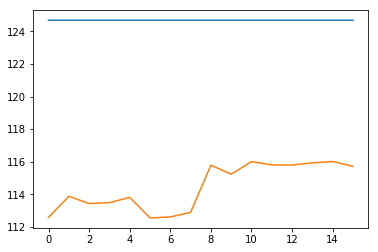

In [12]:
i = randint(0, len(predicted[0]))
print(i)
plt.plot(predicted[0][i])
plt.plot(labels[0][i])

            GLD.US.Close predicted  GLD.US.Close
2018-09-27                     NaN        112.05
2018-09-28                     NaN        112.76
2018-10-01                     NaN        112.57
2018-10-02                     NaN        113.87
2018-10-03                     NaN        113.42
2018-10-04                     NaN        113.48
2018-10-05                     NaN        113.80
2018-10-08                     NaN        112.54
2018-10-09                     NaN        112.60
2018-10-10                     NaN        112.88
2018-10-11                     NaN        115.78
2018-10-12                     NaN        115.23
2018-10-15                     NaN        116.00
2018-10-16                     NaN        115.80
2018-10-17                     NaN        115.79
2018-10-18                     NaN        115.92
2018-10-19              115.920000        116.01
2018-10-22              115.999427        115.71
2018-10-23              116.078855        116.39
2018-10-24          

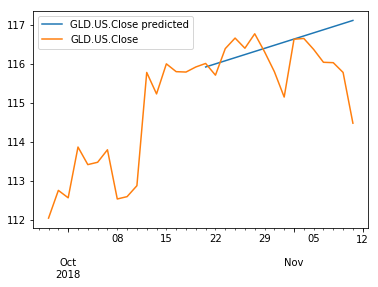

In [11]:
prediction = predictor.predict(-30)
print(prediction)
prediction.plot()

In [1]:
from timeseries_ml_utils.encoders import *
linreg = RegressionLine(12)


In [10]:
import pandas as pd
symbol = "AAPL"
df = pd.read_json(f'https://stockrow.com/api/companies/{symbol}/financials.json?ticker={symbol}&dimension=MRQ&section=Metrics')
df.index = df["id"]
df = df.drop(columns=["id"])

In [11]:
df.T

id,4b7b392d-085c-4120-9c2d-ccda1fe8248f,35a9ad4e-695d-4658-8c6a-e7ee07336499,c1ba09e8-0402-4381-b2c0-1100a93b2081,308efaaa-7e69-48e7-905c-3bf0edf1923f,624782d2-01d3-4af4-8229-fd9964adf867,bf54b649-cd6e-4a52-9eb4-6d2a597a2162,5985ab2b-08da-4204-bb1d-b0ac0d8c3181,fcea4912-aec0-4f4a-99d9-6afc2acd3eb4,51bc8096-a0e8-4063-89a2-2ac094493a36,22412a12-4204-4885-9226-0c5410dd3e2a,...,b1331475-3d57-4b91-9444-4e351b1dbe01,0a880981-31b8-4761-b0bf-e60058e3bd9d,bd7f49f8-33bf-4573-acc8-f213e35864c2,eedb586e-ff17-4ddf-aebe-8ce074eba7b4,ac52dc34-0d64-420a-bd15-2b6505211143,3fe9dc72-b75b-4f3b-845e-b441ed5b7845,bc0870b0-094b-4244-ad4e-3e18ac676f81,7f0ce537-b189-4850-8400-3a87cd110c50,54efb588-3470-4b95-8f91-aae4b98ebcdd,bbd63d98-20ee-4c0b-9338-c89ceb1e2003
2009-03-28,-9.7441,0.5191,6.855,3.8971,-0.5525,3.897,0.0110,0.0199,3.380000e+08,0.7159,...,1.762500e+09,0.1348,0.0110,2.462,0.000,1.492700e+10,0.0351,0.1189,1.4562,0.0000
2009-06-27,-8.4280,1.2418,7.621,4.1381,-1.6593,4.138,0.0310,0.0184,4.625000e+08,0.8959,...,2.144500e+09,0.3629,0.0097,2.111,0.000,1.291800e+10,0.0350,0.1330,1.5560,0.0000
2009-09-26,-5.9674,1.2283,7.484,5.0332,-2.3251,5.033,0.0387,0.0147,4.820000e+08,0.8372,...,3.739500e+09,0.4947,0.0095,2.742,0.000,1.569400e+10,0.0293,0.1518,1.9419,0.0000
2009-12-26,-4.9921,1.7114,8.448,5.6552,-1.8230,5.655,0.0243,0.0131,4.860000e+08,1.2030,...,2.643000e+09,0.9140,0.0092,2.545,0.000,1.517400e+10,0.0254,0.0659,2.4796,0.0000
2010-03-27,-5.4547,0.7580,8.864,6.1938,-1.3935,6.194,0.0223,0.0171,4.750000e+08,1.5769,...,2.409000e+09,0.3668,0.0130,2.644,0.000,1.462700e+10,0.0316,0.1292,2.1249,0.0000
2010-06-26,-5.3205,1.4759,9.975,6.7515,-2.2930,6.752,0.0399,0.0139,6.610000e+08,1.5199,...,4.542500e+09,0.7519,0.0159,2.308,0.000,1.441900e+10,0.0296,0.1304,2.4587,0.0000
2010-09-25,-4.4249,1.3192,11.575,7.4651,-2.4711,7.465,0.0400,0.0110,7.530000e+08,1.7590,...,7.490500e+09,0.8877,0.0144,2.011,0.000,1.428600e+10,0.0243,0.1431,3.1776,0.0000
2010-12-25,-3.2428,1.6277,13.283,8.4950,-3.5478,8.495,0.0472,0.0112,7.305000e+08,1.6681,...,6.982000e+09,1.5187,0.0146,1.846,0.000,1.185100e+10,0.0215,0.1292,4.1555,0.0000
2011-03-26,-3.5078,1.0388,14.493,9.5131,-1.5115,9.513,0.0266,0.0116,7.840000e+08,2.4725,...,6.990500e+09,0.9623,0.0132,1.932,0.000,1.357000e+10,0.0236,0.1055,3.8170,0.0000
2011-06-25,-2.8304,1.5200,16.173,10.6965,-2.0000,10.697,0.0337,0.0099,9.155000e+08,1.8651,...,8.935000e+09,1.7135,0.0179,1.746,0.000,9.483000e+09,0.0220,0.0866,4.4072,0.0000


In [21]:
cot = pd.read_csv("https://freecotdata.com/wp-content/uploads/amcharts/GC2_N.csv")
cot.tail()

,Date,Price,PU,Specs
388,7/15/2011,1590.1,0.36,0.64
389,7/8/2011,1541.6,0.41,0.55
390,7/1/2011,1482.6,0.38,0.57
391,6/24/2011,1500.9,0.31,0.69
392,6/17/2011,1539.1,0.32,0.66


393


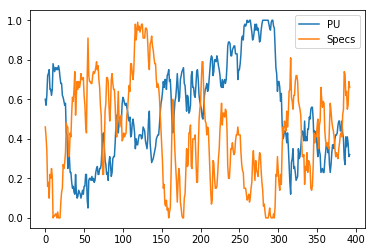

In [19]:
print(len(cot))
cot[["PU", "Specs"]].plot()

In [31]:
from datetime import datetime

df = pd.read_csv("/home/kic/Downloads/cot/all.csv")
df.index = pd.to_datetime(df["As_of_Date_In_Form_YYMMDD"], format='%y%m%d')

/home/kic/sources/github/python/timeseries_ml_utils/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ValueError: day is out of range for month

In [36]:
df = pd.read_excel("/home/kic/Downloads/cot/2017.xls")
df.index = df["Report_Date_as_MM_DD_YYYY"]

In [41]:
df


,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_ALL,Prod_Merc_Positions_Short_ALL,...,Conc_Gross_LE_4_TDR_Short_Other,Conc_Gross_LE_8_TDR_Long_Other,Conc_Gross_LE_8_TDR_Short_Other,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,CFTC_SubGroup_Code,FutOnly_or_Combined
Report_Date_as_MM_DD_YYYY,,,,,,,,,,,,,,,,,,,,,
2017-01-03,EUROBOB OXY NWE CRK SPR - NEW YORK MERCANTILE...,170103,2017-01-03,967654,NYME,1,967,21697,7686,5725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF 1,000 BARRELS)",N10,Combined
2017-01-03,NAPHTHA CRACK SPR SWAP - NEW YORK MERCANTILE E...,170103,2017-01-03,86665A,NYME,1,866,8505,6392,3853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF 1,000 BARRELS)",N10,Combined
2017-01-03,BRENT CRUDE OIL LAST DAY - NEW YORK MERCANTILE...,170103,2017-01-03,06765T,NYME,1,67,141261,13564,12106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF 1,000 BARRELS)",N10,Combined
2017-01-03,PLATINUM - NEW YORK MERCANTILE EXCHANGE,170103,2017-01-03,076651,NYME,1,76,66997,6770,28897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(CONTRACTS OF 50 TROY OUNCES),N20,Combined
2017-01-03,NATURAL GAS PIPELINE-MID-CONTINENT POOL PIN (B...,170103,2017-01-03,0233AY,IFED,1,23,75676,53028,63907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500 mmbtu,N13,Combined
2017-01-03,GULF JET NY HEAT OIL SPR SWAP - NEW YORK MERCA...,170103,2017-01-03,86465A,NYME,1,864,36488,23974,34815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF 42,000 GALLONS)",N10,Combined
2017-01-03,PG&E CITYGATE FIN BASIS - ICE FUTURES ENERGY DIV,170103,2017-01-03,023394,IFED,1,23,107442,99045,80266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Contracts of 2,500 MMBTU'S)",N13,Combined
2017-01-03,PJM WESTERN HUB RT OFF-PK MINI - ICE FUTURES E...,170103,2017-01-03,0643DK,IFED,1,64,122578,105648,98708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1 MW,N16,Combined
2017-01-03,"PJM BGE ZONE DAY AHEAD, PEAK MONTHLY - ICE FUT...",170103,2017-01-03,0643CK,IFED,1,64,15170,13935,7535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1 MW,N16,Combined
